In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.metrics import classification_report, plot_confusion_matrix
from sklearn.preprocessing import LabelEncoder
import seaborn as sbn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('../input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

../input/.DS_Store
../input/heart.csv
../input/iris/Iris.csv
../input/customer-segmentation-tutorial-in-python/Mall_Customers.csv
../input/classification-suv-dataset/Social_Network_Ads.csv
../input/wine-reviews/.DS_Store
../input/wine-reviews/winemag-data-130k-v2.csv
../input/wine-reviews/winemag-data-130k-v2.json
../input/wine-reviews/winemag-data_first150k.csv
../input/random-linear-regression/test.csv
../input/random-linear-regression/train.csv
../input/solar-power-generation-data/Plant_2_Generation_Data.csv
../input/solar-power-generation-data/Plant_1_Generation_Data.csv
../input/solar-power-generation-data/Plant_2_Weather_Sensor_Data.csv
../input/solar-power-generation-data/Plant_1_Weather_Sensor_Data.csv
../input/svm-classification/SVM_Classification.R
../input/svm-classification/UniversalBank.csv
../input/svm-classification/Activity Sheet.docx
../input/house-prices-advanced-regression-techniques/test.csv
../input/house-prices-advanced-regression-techniques/data_description.txt
.

# Importing dataset

In [2]:
df = pd.read_csv("../input/mushroom-classification/mushrooms.csv")

# Checking for missing values

In [3]:
missing_values_cols = [col for col in df.columns if df[col].isnull().any()]
missing_values_cols

[]

# Label Encoding to categorical columns

In [4]:
categorical_cols = [col for col in df.columns if df[col].dtype == 'object']
label_encoder = LabelEncoder()
labelled_df = df.copy()
for col in categorical_cols:
    labelled_df[col] = label_encoder.fit_transform(df[col])
labelled_df.head()

class  cap-shape  cap-surface  cap-color  bruises  odor  gill-attachment  \
0      1          5            2          4        1     6                1   
1      0          5            2          9        1     0                1   
2      0          0            2          8        1     3                1   
3      1          5            3          8        1     6                1   
4      0          5            2          3        0     5                1   

   gill-spacing  gill-size  gill-color  ...  stalk-surface-below-ring  \
0             0          1           4  ...                         2   
1             0          0           4  ...                         2   
2             0          0           5  ...                         2   
3             0          1           5  ...                         2   
4             1          0           4  ...                         2   

   stalk-color-above-ring  stalk-color-below-ring  veil-type  veil-color  \
0                       7                       7          0           2   
1                       7                       7          0           2   
2                       7                       7          0           2   
3                       7                       7          0           2   
4                       7                       7          0           2   

   ring-number  ring-type  spore-print-color  population  habitat  
0            1          4                  2           3        5  
1            1          4                  3           2        1  
2            1          4                  3           2        3  
3            1          4                  2           3        5  
4            1          0                  3           0        1  

[5 rows x 23 columns]

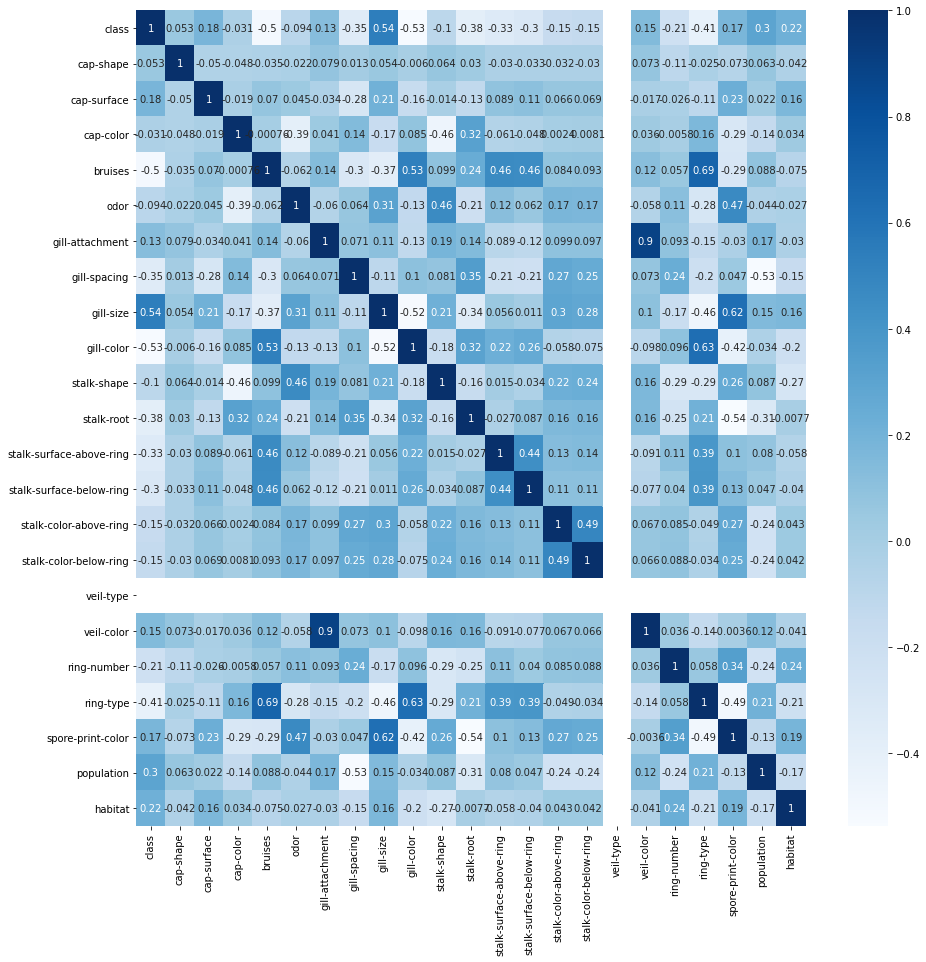

In [5]:
correlation=labelled_df.corr()
plt.figure(figsize=(15,15))
sbn.heatmap(correlation,annot=True,cmap=plt.cm.Blues)

As viel-type is not related to any of the columns, removing it

In [6]:
labelled_df.drop('veil-type', axis=1, inplace=True)

# Dependent and Independent variables

In [7]:
y = labelled_df.iloc[:, 0]
X = labelled_df.iloc[:, 1:22]

# Splitting training and testing dataset

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Applying GridSearchCV to find the best hyperparameters for performing classification

In [9]:
model = DecisionTreeClassifier()
parameters = [{'max_depth': [1,2,3,4,5,6,7,8,9,10]}]
clf = GridSearchCV(model, parameters, cv=5, scoring="accuracy")
clf.fit(X_train, y_train)
print(clf.best_params_)

{'max_depth': 9}


# Applying the best parameters in our model

In [10]:
clf = DecisionTreeClassifier(max_depth=9)
clf.fit(X_train, y_train)

y_test_hat = clf.predict(X_test)
print(classification_report(y_test, y_test_hat))
print(plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues,
                            display_labels=['Poison', 'No poison']))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



# Visualizing

In [11]:
plt.figure(figsize=[20, 10])
tree.plot_tree(clf, rounded= True, filled= True)

[Text(485.2173913043478, 509.625, 'X[8] <= 3.5\ngini = 0.499\nsamples = 6499\nvalue = [3365, 3134]'),
 Text(242.6086956521739, 441.675, 'X[19] <= 3.5\ngini = 0.279\nsamples = 2644\nvalue = [443, 2201]'),
 Text(97.04347826086956, 373.725, 'X[18] <= 1.5\ngini = 0.214\nsamples = 476\nvalue = [418, 58]'),
 Text(48.52173913043478, 305.775, 'gini = 0.0\nsamples = 39\nvalue = [0, 39]'),
 Text(145.56521739130434, 305.775, 'X[20] <= 0.5\ngini = 0.083\nsamples = 437\nvalue = [418, 19]'),
 Text(97.04347826086956, 237.825, 'gini = 0.0\nsamples = 19\nvalue = [0, 19]'),
 Text(194.08695652173913, 237.825, 'gini = 0.0\nsamples = 418\nvalue = [418, 0]'),
 Text(388.17391304347825, 373.725, 'X[10] <= 2.0\ngini = 0.023\nsamples = 2168\nvalue = [25, 2143]'),
 Text(339.6521739130435, 305.775, 'X[12] <= 0.5\ngini = 0.008\nsamples = 2152\nvalue = [9, 2143]'),
 Text(291.1304347826087, 237.825, 'X[10] <= 0.5\ngini = 0.453\nsamples = 26\nvalue = [9, 17]'),
 Text(242.6086956521739, 169.875, 'gini = 0.0\nsamples =